# Capstone 3: Pneumonia X-Ray Classification
## Data Wrangling and EDA

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing import image_dataset_from_directory
import os

## Exploring Datasets
1. https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
2. https://www.kaggle.com/datasets/salonimate/covid-pneumonia-nomal-xray


In [2]:
# Define the image size and batch size
img_height = 128
img_width = 128
batch_size = 32

### First Dataset

In [3]:
ds_1_path = '../images/chest_xray'

In [4]:
!ls {ds_1_path}

test  train val


In [5]:
train_dir_2 = f"{ds_1_path}/train"
val_dir_2 = f"{ds_1_path}/val"
test_dir_2 = f"{ds_1_path}/test"

In [6]:
train_ds_1 = image_dataset_from_directory(
    train_dir_2,
    color_mode='grayscale',
    image_size = (img_height, img_width),
    batch_size = batch_size)

val_ds_1 = image_dataset_from_directory(
    val_dir_2,
    color_mode='grayscale',
    image_size = (img_height, img_width),
    batch_size = batch_size)

test_ds_1 = image_dataset_from_directory(
    test_dir_2,
    color_mode='grayscale',
    image_size = (img_height, img_width),
    batch_size = batch_size)

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [7]:
# Get the class names
class_names_2 = {i: train_ds_1.class_names[i] for i in range(len(train_ds_1.class_names))}
class_names_2

{0: 'NORMAL', 1: 'PNEUMONIA'}

2024-06-03 11:41:17.740153: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [5216]
	 [[{{node Placeholder/_0}}]]
2024-06-03 11:41:17.740600: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [5216]
	 [[{{node Placeholder/_4}}]]
2024-06-03 11:41:17.776341: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


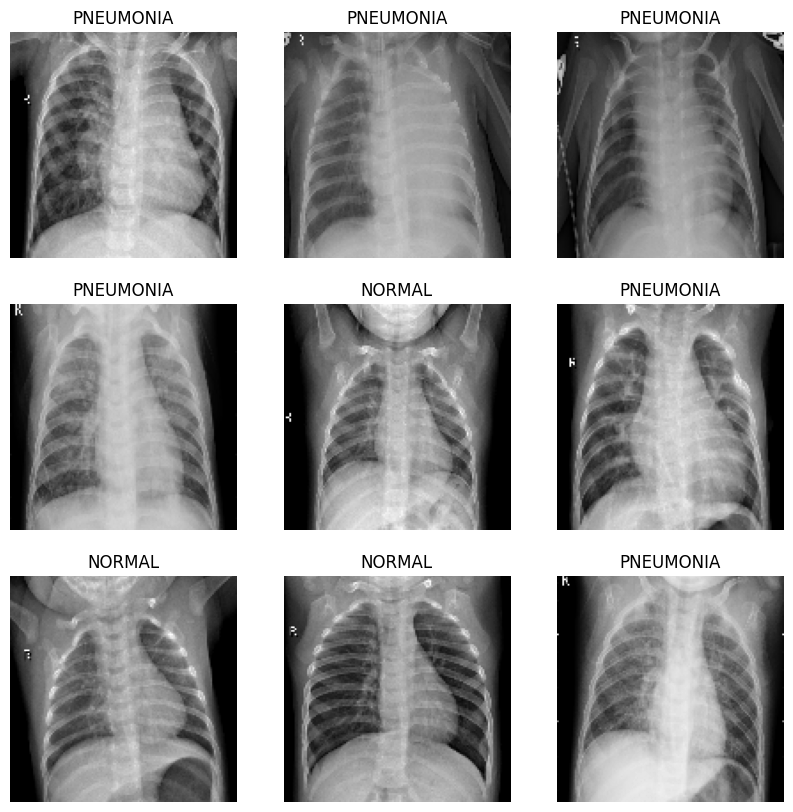

In [8]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds_1.take(1):
    for i in range(9):
        plt.subplot(3,3, i + 1)
        plt.imshow(np.squeeze(images[i].numpy().astype('uint8')), cmap='gray')
        plt.title(train_ds_1.class_names[labels[i]])
        plt.axis("off")

### Second Dataset

In [9]:
ds_2_path = '../images/New-CNP-Dataset'

In [10]:
!ls {ds_2_path}

testing    train      validation


In [11]:
train_dir_2 = f"{ds_2_path}/train"
val_dir_2 = f"{ds_2_path}/validation"
test_dir_2 = f"{ds_2_path}/testing"

In [12]:
train_ds_2 = image_dataset_from_directory(
    train_dir_2,
    color_mode='grayscale',
    image_size = (img_height, img_width),
    batch_size = batch_size)

val_ds_2 = image_dataset_from_directory(
    val_dir_2,
    color_mode='grayscale',
    image_size = (img_height, img_width),
    batch_size = batch_size)

test_ds_2 = image_dataset_from_directory(
    test_dir_2,
    color_mode='grayscale',
    image_size = (img_height, img_width),
    batch_size = batch_size)

Found 4488 files belonging to 3 classes.
Found 1033 files belonging to 3 classes.
Found 1381 files belonging to 3 classes.


In [13]:
# Get the class names
class_names_2 = {i: train_ds_2.class_names[i] for i in range(len(train_ds_2.class_names))}
class_names_2

{0: 'covid', 1: 'normal', 2: 'pneumonia'}

2024-06-03 11:41:19.187696: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [4488]
	 [[{{node Placeholder/_0}}]]
2024-06-03 11:41:19.188020: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [4488]
	 [[{{node Placeholder/_0}}]]
2024-06-03 11:41:19.212256: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: cHRM: invalid values


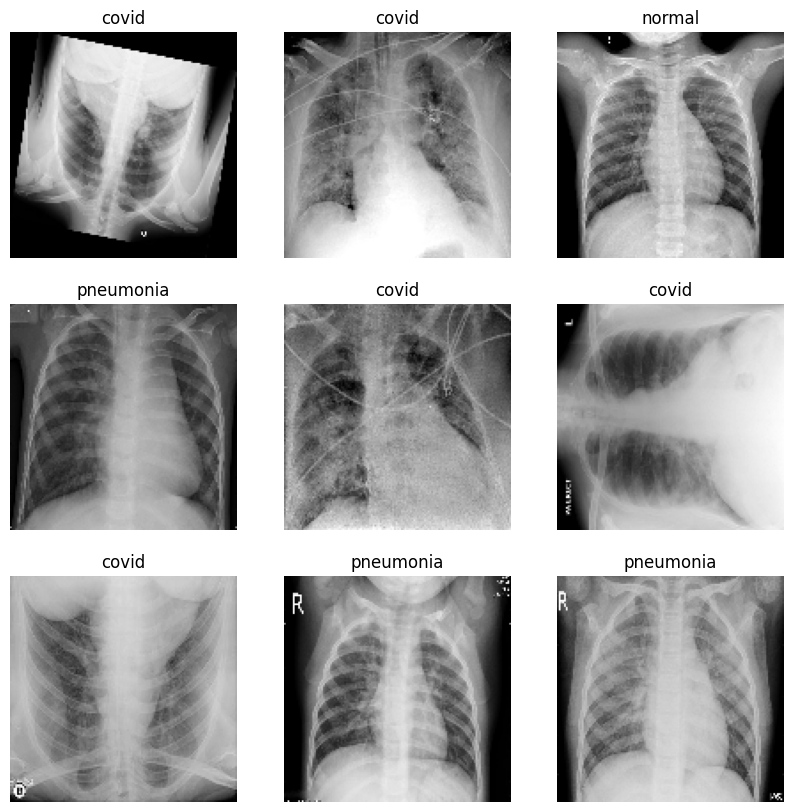

In [14]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds_2.take(1):
    for i in range(9):
        plt.subplot(3,3, i + 1)
        plt.imshow(np.squeeze(images[i].numpy().astype('uint8')), cmap='gray')
        plt.title(train_ds_2.class_names[labels[i]])
        plt.axis("off")

# Datasets Summary and Combination Approach

The first dataset (2 Classes: `NORMAL`, `PNEUMONIA`)

- `Train`: 
    - 5216 files
- `Validation`:  
    - 16 files
- `Test`: 
    - 624 files

The second dataset (3 Classes: `covid`, `normal`, `pneumonia`):

- `Train`:
    - 4488 files
- `Validation`:
    - 1033 files
- `Test`:
    - 1381 files

There is an additional class in the second dataset: `covid`. 
As our model will be the pneumonia classificator, it will return only 2 classes: `NORMAL` and `PNEUMONINA`. 
Two possible approaches to dead with the third class in the second dataset are: 
- Treat covid images as pneumonia,
- Drop all these images alltogether.

Several studies have concluded that Covid X-Rays could improve model's ability to classify pneumonia by making it more robust to variations. However it's crutial to to avoid overfitting to specific features of COVID-19 that are not present in other types of pneumonia. So if the COVID images are not typical of pneumonia, they could potentially confuse the model.

The __approach__ chosen in this work is:
- Train the model on the `NORMAL` and `PNEUMONIA` classes from both datasets as the base model.
- Then finetune the model on the `covid` images and compare the performance vs the base model.

# Creating the Final Image Directory

In [15]:
# Create new folder in the images directory called 'combined'
combined_dir = '../images/combined'
os.makedirs(combined_dir, exist_ok=True)

In [16]:
# Create new folders in the combined directory for train, val, and test
train_dir = f"{combined_dir}/train"
val_dir = f"{combined_dir}/val"
test_dir = f"{combined_dir}/test"

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

In [17]:
# Copy the images from the two datasets to the combined directory
!cp -r {ds_1_path}/train/NORMAL {train_dir}
!cp -r {ds_1_path}/train/PNEUMONIA {train_dir}
!cp -r {ds_1_path}/val/NORMAL {val_dir}
!cp -r {ds_1_path}/val/PNEUMONIA {val_dir}
!cp -r {ds_1_path}/test/NORMAL {test_dir}
!cp -r {ds_1_path}/test/PNEUMONIA {test_dir}

# Copy the images fom the second dataset to the combined directory, but change the class names to match the first dataset class names and skip the covid images
!cp -r {ds_2_path}/train/normal {train_dir}/NORMAL
!cp -r {ds_2_path}/train/pneumonia {train_dir}/PNEUMONIA
!cp -r {ds_2_path}/validation/normal {val_dir}/NORMAL
!cp -r {ds_2_path}/validation/pneumonia {val_dir}/PNEUMONIA
!cp -r {ds_2_path}/testing/normal {test_dir}/NORMAL
!cp -r {ds_2_path}/testing/pneumonia {test_dir}/PNEUMONIA

In [40]:
# Create the new datasets
train_ds = image_dataset_from_directory(
    train_dir,
    color_mode='grayscale',
    image_size = (img_height, img_width),
    batch_size = batch_size)

val_ds = image_dataset_from_directory(
    val_dir,
    color_mode='grayscale',
    image_size = (img_height, img_width),
    batch_size = batch_size)

test_ds = image_dataset_from_directory(
    test_dir,
    color_mode='grayscale',
    image_size = (img_height, img_width),
    batch_size = batch_size)


Found 8226 files belonging to 2 classes.
Found 708 files belonging to 2 classes.
Found 1548 files belonging to 2 classes.


In [41]:
# Get the class names
class_names = {i: train_ds.class_names[i] for i in range(len(train_ds.class_names))}
class_names

{0: 'NORMAL', 1: 'PNEUMONIA'}

Imbalance in the dataset:
normal_images/pneumonia_images = 0.3462332301341589



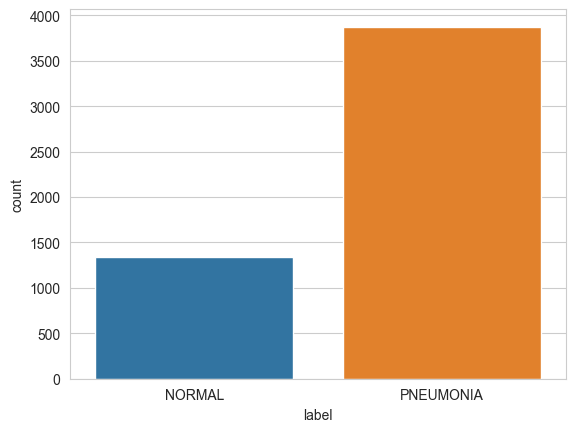

In [42]:
# Get the number of NORMAL and PNEUMONIA images in the training dataset
normal_images = len(os.listdir(f"{train_dir}/NORMAL"))
pneumonia_images = len(os.listdir(f"{train_dir}/PNEUMONIA"))

print(f"Imbalance in the dataset:\n{normal_images/pneumonia_images = }\n")

# Plot the number of NORMAL and PNEUMONIA images in the training dataset
sns.countplot(x='label', data=pd.DataFrame({'label': ['NORMAL']*normal_images + ['PNEUMONIA']*pneumonia_images}));

2024-06-03 11:51:07.172505: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [8226]
	 [[{{node Placeholder/_4}}]]
2024-06-03 11:51:07.172924: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [8226]
	 [[{{node Placeholder/_4}}]]


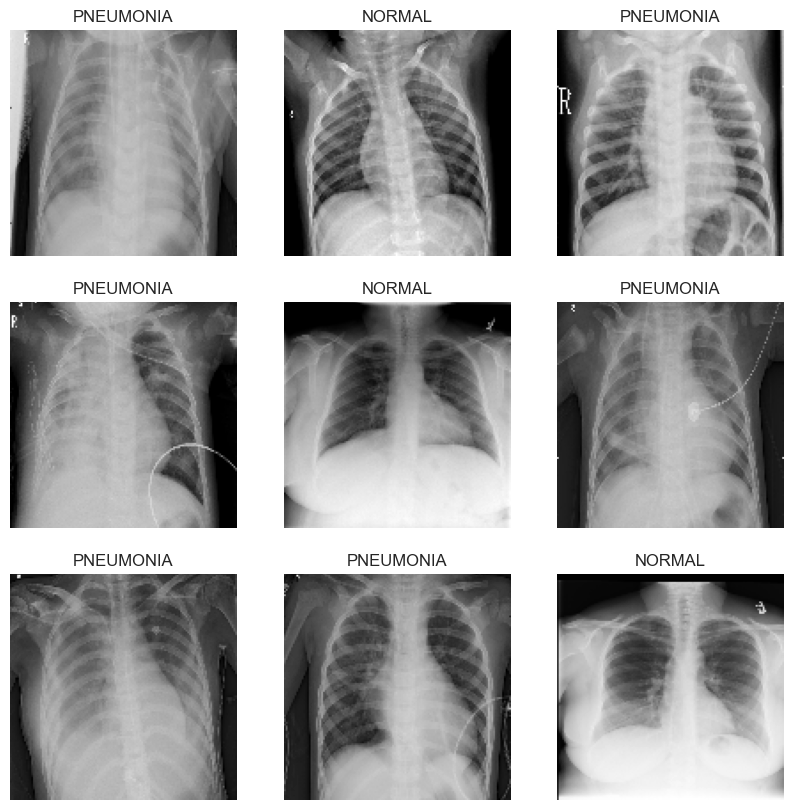

In [43]:
# Plot the images
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i + 1)
        plt.imshow(np.squeeze(images[i].numpy().astype('uint8')), cmap='gray')
        plt.title(train_ds.class_names[labels[i]])
        plt.axis("off")

# Summary

The two initial datasets were combined into one, which has two classes: `NORMAL` and `PNEUMONIA`.

- 8,226 files in the `TRAIN` set
- 708 files in the `VALIDATION` set
- 1,548 files in the `TEST` set

The `COVID` images are kept for later fine-tuning of the base model.

As seen in the bar plot of the test dataset, there is an imbalance, so it needs to be balanced using image augmentation techniques to increase the model's performance.

## Thoughts on Data Augmentation Techniques for Medical Images

Various data augmentation techniques are used in image processing, such as:

- Rotation
- Zooming
- Flipping
- Brightness and Contrast
- Blurring
- GAN (DCGAN): Deep Convolutional Generative Adversarial Network

Although most of these techniques may enhance the performance of image recognition models by introducing variations to the training images, __not all of them are useful for the medical field__, especially for applications like X-ray imaging.

For example, the human heart is almost always on the left (which appears on the right on a frontal chest X-ray), and flipping would give our model many instances of the rare condition dextrocardia (0.22%-1% incidence in the general population), which may skew the results. 

Blurring is another example of a poor image augmentation technique for this task because a blurred X-ray is considered unusable and should be retaken.

In the end, we are left with two main categories of image augmentations:

- Destructive (those which remove image features and skew results)
- Non-Destructive (those which provide pixel variations needed to improve the model's performance)

The __GAN__ technique has been shown to improve model performance by augmenting the training set with generated images ([Puttagunta M, Subban R, C NKB. A Novel COVID-19 Detection Model Based on DCGAN and Deep Transfer Learning. Procedia Comput Sci. 2022;204:65-72. doi: 10.1016/j.procs.2022.08.008. Epub 2022 Sep 10. PMID: 36120410; PMCID: PMC9464299)](https://doi.org/10.1016/j.procs.2022.08.008).

The best approach would be to use a combination of GAN with random:

- Rotation
- Zooming
- Brightness
- Contrast
- Height/Width Shift
- Shear